<a href="https://colab.research.google.com/github/jieunlim/TensorflowTest2022/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion Mnist**


*  Fashion-mnist data is a dataset of Zalando’s article 28 x 28 gray scale images consisting of 60,000 training set examples and 10,000 test set examples.

*  It has 10 classes labeled as below.

    *Ankle boot, Bag, Coat, Dress, Pullover, Sandal, Shirt, Sneaker, T-shirt/top, Trouser*

   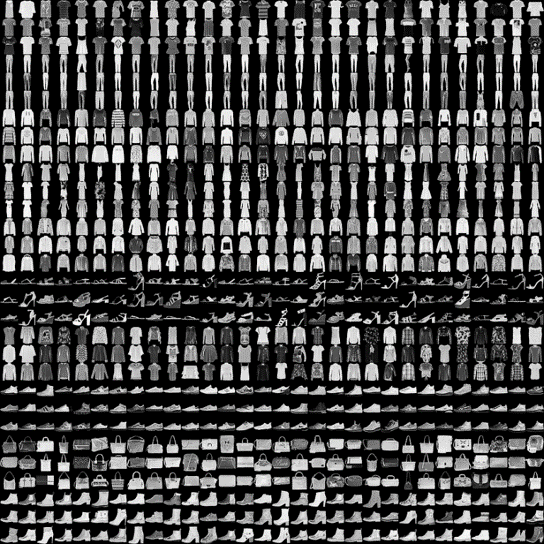

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

# **Model1**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
    

(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()

x_train = x_train / 255
x_valid = x_valid / 255

model1 = tf.keras.models.Sequential([
      tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
      tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax'),
  ])


model1.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy', 
        metrics=['acc']
    )

checkpoint_path = 'checkpoint.ckpt'
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    save_weights_only=True, 
    save_best_only=True, 
    monitor='val_loss', 
    verbose=1        
)

model1.fit(
    x_train, 
    y_train,
    validation_data=(x_valid, y_valid),
    epochs=10,
    callbacks=[cp]
)

model1.load_weights(checkpoint_path)




Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.5039 - acc: 0.8107
Epoch 1: val_loss improved from inf to 0.38142, saving model to checkpoint.ckpt
1875/1875 [==============================] - 68s 36ms/step - loss: 0.5039 - acc: 0.8107 - val_loss: 0.3814 - val_acc: 0.8613
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3103 - acc: 0.8849
Epoch 2: val_loss improved from 0.38142 to 0.30693, saving model to checkpoint.ckpt
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3103 - acc: 0.8849 - val_loss: 0.3069 - val_acc: 0.8902
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.2623 - acc: 0.9032
Epoch 3: val_loss did not improve from 0.30693
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2623 - acc: 0.9032 - val_loss: 0.3819 - val_acc: 0.8669
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.2318 - acc: 0.9140
Epoch 4: val_loss improved from 0.30693 to

*   **Model1: loss: 0.1390 - acc: 0.9463 - val_loss: 0.2869 - val_acc: 0.9135**

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 64)         

# **Model2**

In [ ]:
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding ='same'), 
            tf.keras.layers.MaxPooling2D(2,2),
            
            tf.keras.layers.Conv2D(256, 3, activation='relu', padding = 'same'),
            
            tf.keras.layers.Conv2D(256, 3, activation='relu', padding = 'same'),
            tf.keras.layers.MaxPooling2D(2),
            
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation ='relu'),
            tf.keras.layers.Dropout(0.5),
            
            tf.keras.layers.Dense(64, activation = 'relu'),
            tf.keras.layers.Dropout(0.5),
            
            tf.keras.layers.Dense(10, activation ='softmax')                                                            
    ])
    
model2.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy', 
        metrics=['acc']
    )

checkpoint_path = 'checkpoint.ckpt'
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    save_weights_only=True, 
    save_best_only=True, 
    monitor='val_loss', 
    verbose=1        
)

model2.fit(
    x_train, 
    y_train,
    validation_data=(x_valid, y_valid),
    epochs=10,
    callbacks=[cp]
)

model2.load_weights(checkpoint_path)

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.7746 - acc: 0.7190
Epoch 1: val_loss improved from inf to 0.43161, saving model to checkpoint.ckpt
1875/1875 [==============================] - 384s 204ms/step - loss: 0.7746 - acc: 0.7190 - val_loss: 0.4316 - val_acc: 0.8431
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.4798 - acc: 0.8341
Epoch 2: val_loss improved from 0.43161 to 0.41668, saving model to checkpoint.ckpt
1875/1875 [==============================] - 377s 201ms/step - loss: 0.4798 - acc: 0.8341 - val_loss: 0.4167 - val_acc: 0.8488
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.4144 - acc: 0.8562
Epoch 3: val_loss improved from 0.41668 to 0.35957, saving model to checkpoint.ckpt
1875/1875 [==============================] - 384s 205ms/step - loss: 0.4144 - acc: 0.8562 - val_loss: 0.3596 - val_acc: 0.8698
Epoch 4/10
1875/1875 [=======



*   **Model1: loss: 0.1390 - acc: 0.9463 - val_loss: 0.2869 - val_acc: 0.9135**
*   Model2: loss: 0.2690 - acc: 0.9065 - val_loss: 0.3259 - val_acc: 0.8888

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 1)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         147712    
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         5

# **Model3**

In [ ]:
model3 = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
        tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ])
    
model3.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy', 
        metrics=['acc']
    )

checkpoint_path = 'checkpoint.ckpt'
cp = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path, 
        save_weights_only=True, 
        save_best_only=True, 
        monitor='val_loss', 
        verbose=1        
    )

model3.fit(
        x_train, 
        y_train,
        validation_data=(x_valid, y_valid),
        epochs=20,
        callbacks=[cp]
    )

model3.load_weights(checkpoint_path)



Epoch 1/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.5274 - acc: 0.8020
Epoch 1: val_loss improved from inf to 0.36653, saving model to checkpoint.ckpt
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5273 - acc: 0.8021 - val_loss: 0.3665 - val_acc: 0.8706
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.3206 - acc: 0.8832
Epoch 2: val_loss improved from 0.36653 to 0.33617, saving model to checkpoint.ckpt
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3206 - acc: 0.8832 - val_loss: 0.3362 - val_acc: 0.8763
Epoch 3/20
1875/1875 [==============================] - ETA: 0s - loss: 0.2741 - acc: 0.9007
Epoch 3: val_loss improved from 0.33617 to 0.29888, saving model to checkpoint.ckpt
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2741 - acc: 0.9007 - val_loss: 0.2989 - val_acc: 0.8901
Epoch 4/20
1875/1875 [==============================] - ETA: 0s - loss: 0.2483 - acc: 0.9085
Epoch

*   **Model1: loss: 0.1390 - acc: 0.9463 - val_loss: 0.2869 - val_acc: 0.9135**
*   Model2: loss: 0.2690 - acc: 0.9065 - val_loss: 0.3259 - val_acc: 0.8888
*   Model3: loss: 0.1010 - acc: 0.9626 - val_loss: 0.3626 - val_acc: 0.9062

# **Model4**

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)         

In [ ]:
model4 = tf.keras.models.Sequential([
    
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(128, input_dim = 20, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation='softmax'),
    ])

model4.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy', 
        metrics=['acc']
    )

checkpoint_path = 'checkpoint.ckpt'
cp = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path, 
        save_weights_only=True, 
        save_best_only=True, 
        monitor='val_loss', 
        verbose=1        
    )

model4.fit(
        x_train, 
        y_train,
        validation_data=(x_valid, y_valid),
        epochs=20,
        callbacks=[cp]
    )

model4.load_weights(checkpoint_path)



Epoch 1/20
1875/1875 [==============================] - ETA: 0s - loss: 0.1645 - acc: 0.9387
Epoch 1: val_loss improved from inf to 0.29974, saving model to checkpoint.ckpt
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1645 - acc: 0.9387 - val_loss: 0.2997 - val_acc: 0.9090
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.1526 - acc: 0.9439
Epoch 2: val_loss improved from 0.29974 to 0.27813, saving model to checkpoint.ckpt
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1526 - acc: 0.9439 - val_loss: 0.2781 - val_acc: 0.9119
Epoch 3/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.1444 - acc: 0.9462
Epoch 3: val_loss did not improve from 0.27813
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1444 - acc: 0.9462 - val_loss: 0.3273 - val_acc: 0.9010
Epoch 4/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.1389 - acc: 0.9483
Epoch 4: val_loss did not improve from 0.2

*   **Model1: loss: 0.1390 - acc: 0.9463 - val_loss: 0.2869 - val_acc: 0.9135**
*   Model2: loss: 0.2690 - acc: 0.9065 - val_loss: 0.3259 - val_acc: 0.8888
*   Model3: loss: 0.1010 - acc: 0.9626 - val_loss: 0.3626 - val_acc: 0.9062
*   Model4: loss: 0.0740 - acc: 0.9730 - val_loss: 0.4064 - val_acc: 0.9121

In [ ]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)         

# **Summary: Using Model1**
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 512)               33280     
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
=================================================================